# Função Datetime

permite a criação de datas


In [2]:
from datetime import datetime

dt=datetime(year=2017,month=7,day=4)
dt

datetime.datetime(2017, 7, 4, 0, 0)

# Parser

transforma strings de data e hora em objetos datetime 

In [4]:
from dateutil import parser
date=parser.parse('October 26th,2023')
date

datetime.datetime(2023, 10, 26, 0, 0)

# Numpy 


In [7]:
import numpy as np
date=np.array('2017-07-04', dtype=np.datetime64)
date

array('2017-07-04', dtype='datetime64[D]')

In [9]:
#adiciona dias a data atual

date+np.arange(12)

array(['2017-07-04', '2017-07-05', '2017-07-06', '2017-07-07',
       '2017-07-08', '2017-07-09', '2017-07-10', '2017-07-11',
       '2017-07-12', '2017-07-13', '2017-07-14', '2017-07-15'],
      dtype='datetime64[D]')

# Exemplo de Serie temporal

Aqui o intuito é transformar um objeto em uma serie

In [21]:
from pandas import read_csv
import pandas as pd

series=read_csv('female_birth.csv',parse_dates=[0],index_col=0)
# parse_dates=[0]= sinaliza que a primeira coluna do Dataframe é uma data
series.head()

,"Daily total female births in California, 1959"
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [13]:
#transforma o objeto em uma serie com um a coluna e um indice

series=series.squeeze("columns")
print(type(series))

<class 'pandas.core.series.Series'>


In [14]:
print(series.head())

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: Daily total female births in California, 1959, dtype: int64


In [16]:
print(series.size)

366


In [17]:
print(series.describe())

count     366.000000
mean       47.218579
std       100.472534
min        23.000000
25%        37.000000
50%        42.000000
75%        46.000000
max      1959.000000
Name: Daily total female births in California, 1959, dtype: float64


# Importação de datas sem o dia

In [20]:
dados=read_csv('AirPassengers.csv')
dados

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


No dataframe acima não temos a informação de dia, então como faríamos para que essa coluna seja reconhecida como uma data?

In [24]:
dadosparse= lambda dates: pd.to_datetime(dates, format='%Y-%m')
dados=pd.read_csv('AirPassengers.csv',parse_dates=['Month'],index_col='Month',date_format=dadosparse)
dados

,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


In [25]:
dados.head()

,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [27]:
dados.index

Index(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
       '1949-07', '1949-08', '1949-09', '1949-10',
       ...
       '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
       '1960-09', '1960-10', '1960-11', '1960-12'],
      dtype='object', name='Month', length=144)

# Importação de gráficos

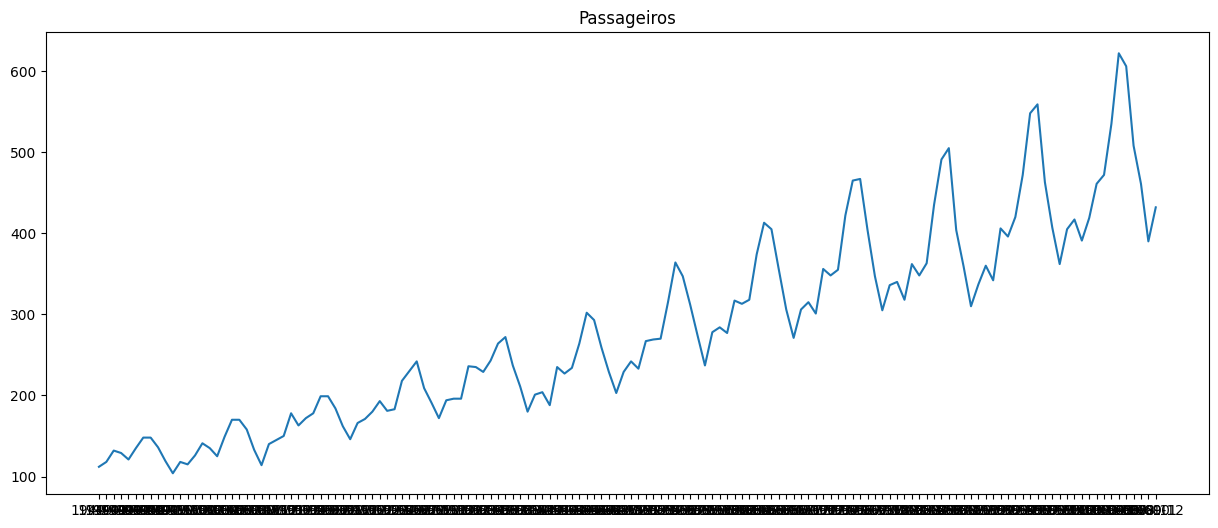

In [ ]:
import matplotlib.pyplot as plt
# rcParams permite configurar parametros
from matplotlib.pylab import rcParams
#15 unidades de largura x 6 de altura
rcParams['figure.figsize']=15,6
#para impressao de datas importo o register_matplotlib_converters
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.plot(dados)
plt.title("Passageiros")
plt.show()

# Pré-processamento de dados

In [2]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] =15,6



In [ ]:
#seta o tempo como index
df=pd.read_csv("italy_earthquakes_from_2016-08-24_to_2016-11-30.csv").set_index("Time")
#transforma o index do tipo dataframe para datetime
df.index=pd.to_datetime(df.index)
df.head()

,Latitude,Longitude,Depth/Km,Magnitude
Time,,,,
2016-08-24 03:36:32.000,42.6983,13.2335,8.1,6.0
2016-08-24 03:37:26.580,42.7123,13.2533,9.0,4.5
2016-08-24 03:40:46.590,42.7647,13.1723,9.7,3.8
2016-08-24 03:41:38.900,42.7803,13.1683,9.7,3.9
2016-08-24 03:42:07.170,42.7798,13.1575,9.7,3.6


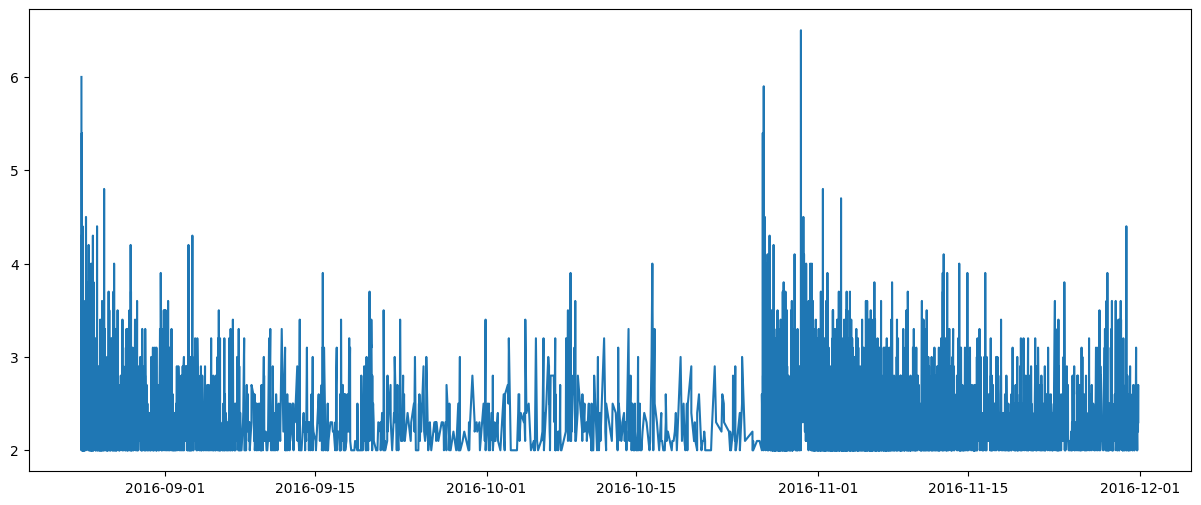

In [4]:
#plota a coluna de magnitude no datframe
plt.plot(df["Magnitude"])
plt.show()

C:\Users\vitnasci\AppData\Local\Temp\ipykernel_4512\2042705085.py:5: FutureWarning: The provided callable <function mean at 0x0000023D96727880> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  res=df["Magnitude"].resample("D").apply([np.mean])


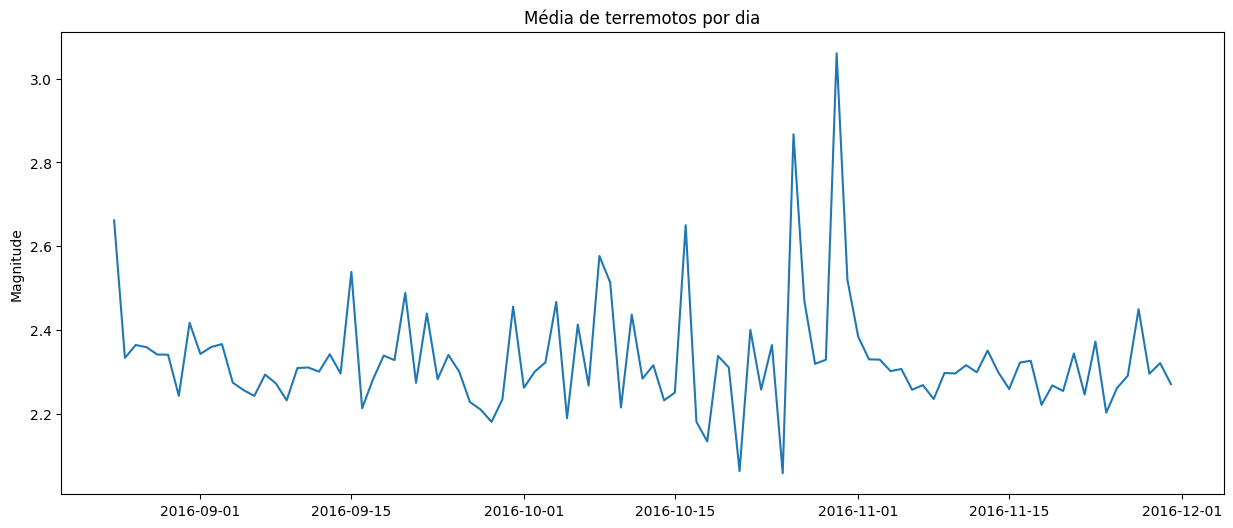

In [6]:
# resample faz uma amostra dos dados a partir de um 
#intervalo passado (segundo, minuto, dia, hora..)
# reamostragem dos dados com a media de cada dia
# D se refere a dia, assim como W a week e M a month
res=df["Magnitude"].resample("D").apply([np.mean])
plt.title("Média de terremotos por dia")
plt.ylabel("Magnitude")
plt.plot(res)
plt.show()

C:\Users\vitnasci\AppData\Local\Temp\ipykernel_4512\2690253394.py:3: FutureWarning: The provided callable <function mean at 0x0000023D96727880> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  res=df["Magnitude"].resample("2D").apply([np.mean])


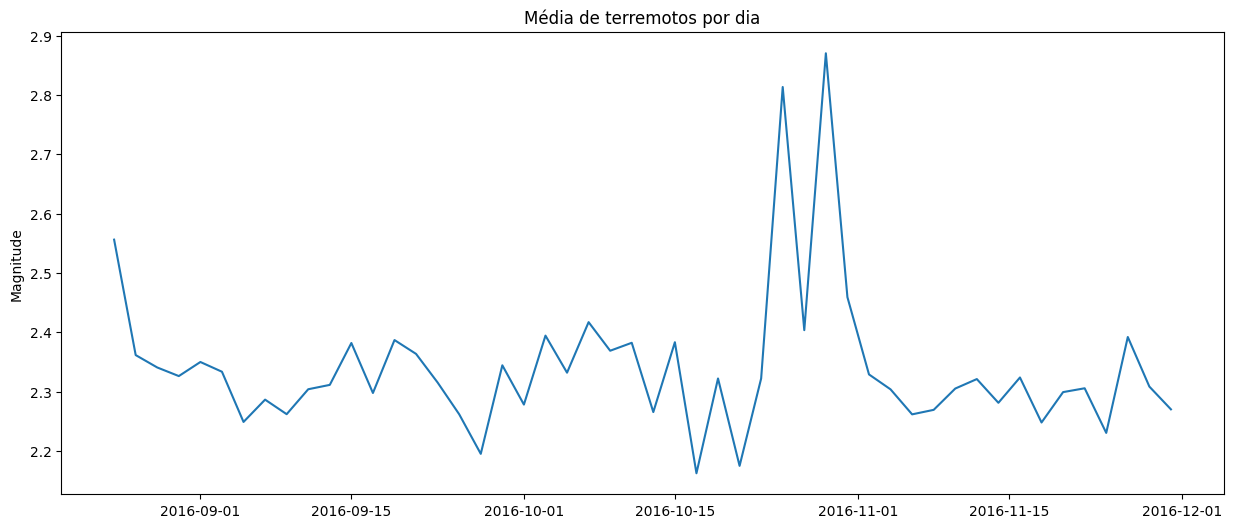

In [7]:
# Amostragem da media dos dados a cada 2 dias

res=df["Magnitude"].resample("2D").apply([np.mean])
plt.title("Média de terremotos por dia")
plt.ylabel("Magnitude")
plt.plot(res)
plt.show()

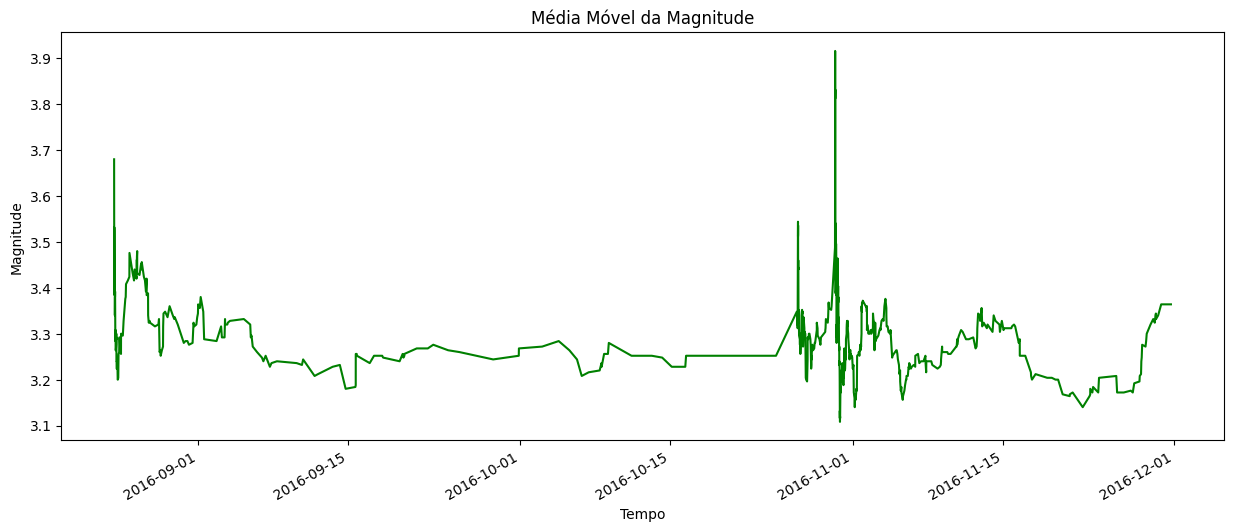

In [9]:
# Gráfico para mostrar as magnitudes maiores que 3

mag3=df.loc[df["Magnitude"]>=3,"Magnitude"]
#media movel com janela de 25 periodos
pd.Series.rolling(mag3,window=25).mean().plot(style="g")
plt.title("Média Móvel da Magnitude")
plt.ylabel("Magnitude")
plt.xlabel("Tempo")
plt.show()

# Resumo e agregações


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("avocado.csv",parse_dates=['Date'])
#parse_dates diz que a coluna de data tem o nome 'Date'

In [3]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
# Aqui os dados sao agrupados por data e o volume total é uma media de cada um desses agrupamentos
summr=data.groupby('Date')['Total Volume'].mean()
summr.head()

Date
2015-01-04    7.840216e+05
2015-01-11    7.273686e+05
2015-01-18    7.258221e+05
2015-01-25    7.080211e+05
2015-02-01    1.106048e+06
Name: Total Volume, dtype: float64

In [ ]:
#reset_index, reseta o index para um numero sequencial
summr=data.groupby('Date')['Total Volume'].mean().reset_index()
summr.head()

,Date,Total Volume
0,2015-01-04,7.840216e+05
1,2015-01-11,7.273686e+05
2,2015-01-18,7.258221e+05
3,2015-01-25,7.080211e+05
4,2015-02-01,1.106048e+06


In [ ]:
data.index
#mostra a quantidade de linhas que tem no arquivo 

RangeIndex(start=0, stop=18249, step=1)

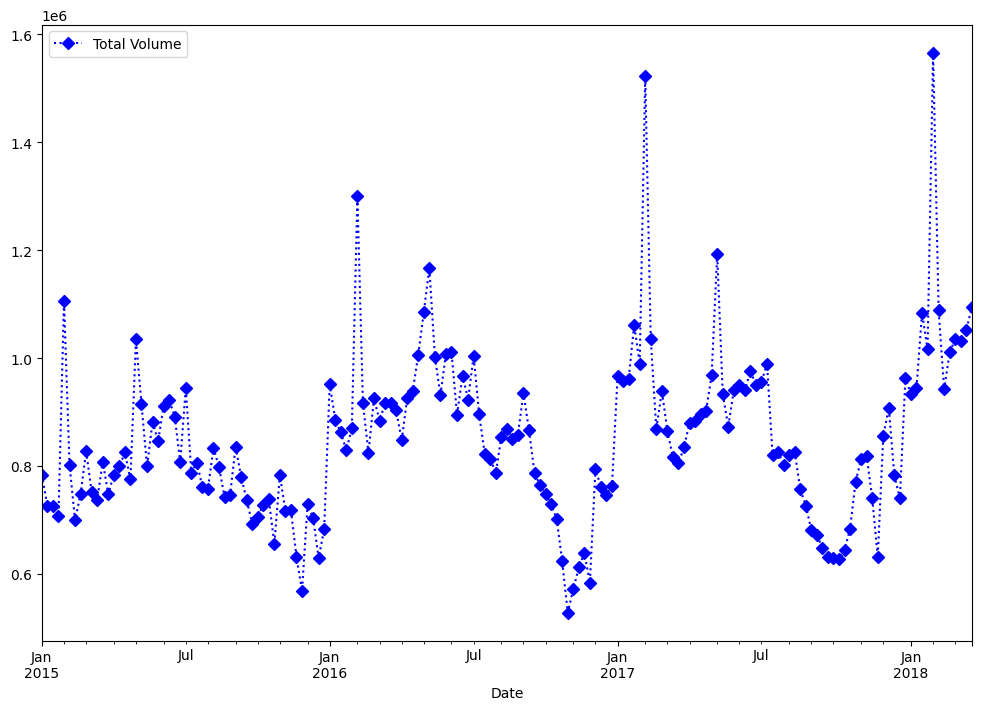

In [ ]:
# fig se refere a figura como um todo
# ax é uma parte da figura
# portanto aqui iremos usar somente uma parte do todo da figura, o que explica o subplot so ter um
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
# a seguir uso a data como index e o ax como padrão de configuração
summr.set_index('Date').plot(ax=ax, marker="D", linestyle=":", color="blue")
plt.show()

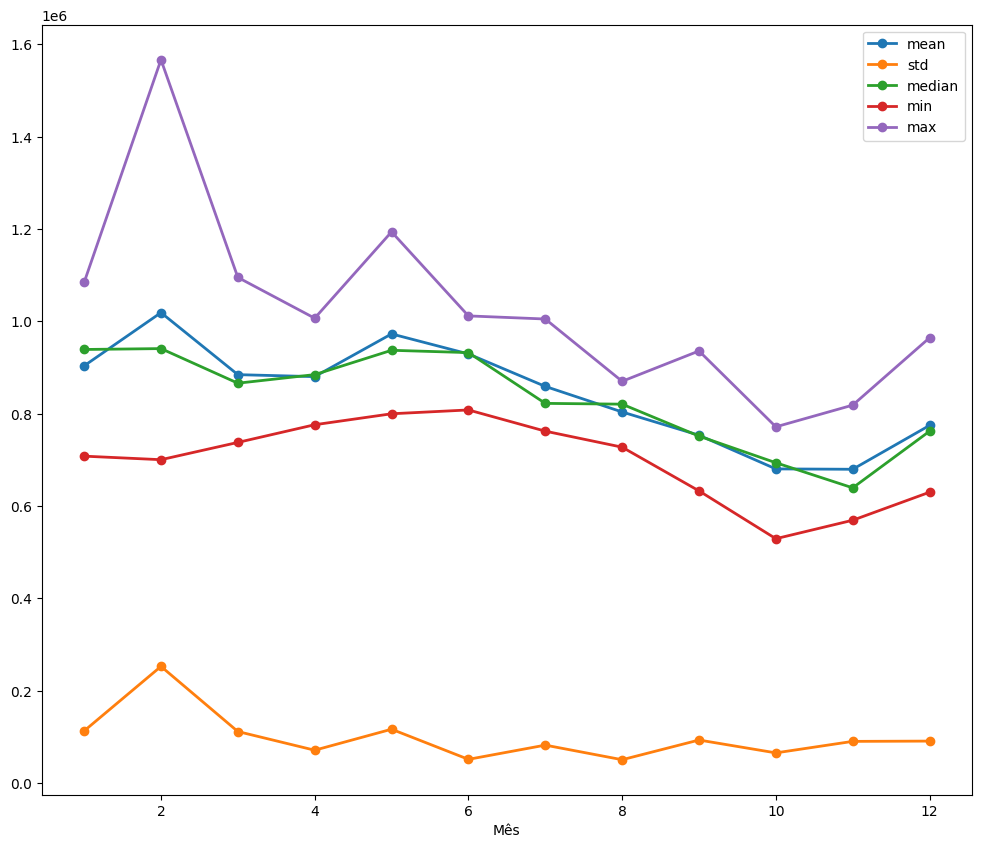

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
summr = summr.set_index('Date')
#nova coluna
summr['month'] = summr.index.month
#agrupa por mês e calcula estatisticas
grouped = summr.groupby('month')['Total Volume'].agg(["mean", "std", "median", "min", "max"])
grouped.plot(ax=ax, marker="o", linewidth=2)
ax.set_xlabel('Mês')
plt.show()

# Gráficos om múltiplas linhas

In [10]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

rcParams['figure.figsize']=15,6

df=pd.read_csv('all-stocks-2006-01-01-to-2018-01-01.csv', parse_dates=['Date'])
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
1,2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2,2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
3,2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
4,2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM


In [11]:
# aqui irei pegar os valores de abertura dos 5 primeiros produtos.
worst_stocks=df[df.Date==df.Date.max()].sort_values('Open').head(5)
worst_stocks

,Date,Open,High,Low,Close,Volume,Name
33217,2017-12-29,17.27,17.53,17.27,17.45,76149513,GE
66434,2017-12-29,36.23,36.49,36.22,36.22,11421487,PFE
21137,2017-12-29,38.41,38.62,38.30,38.30,12583621,CSCO
24157,2017-12-29,45.70,46.18,45.69,45.88,8371536,KO
45296,2017-12-29,46.21,46.49,46.09,46.16,17394491,INTC


In [13]:
# crio variavel para armarzenar os nomes dos piores stocks
ws=worst_stocks.Name.values
ws

array(['GE', 'PFE', 'CSCO', 'KO', 'INTC'], dtype=object)

In [15]:
# Aqui irei criar uma copia do data frame original para extrair o agrupamento de nomes 
# contidos na variavel ws acima
tdf=df.copy()
# crio um indice para o dataframe que possui a copia de dados
tdf=df.set_index('Date')
tdf

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM
...,...,...,...,...,...,...
2017-12-22,71.42,71.87,71.22,71.58,10979165,AABA
2017-12-26,70.94,71.39,69.63,69.86,8542802,AABA
2017-12-27,69.77,70.49,69.69,70.06,6345124,AABA


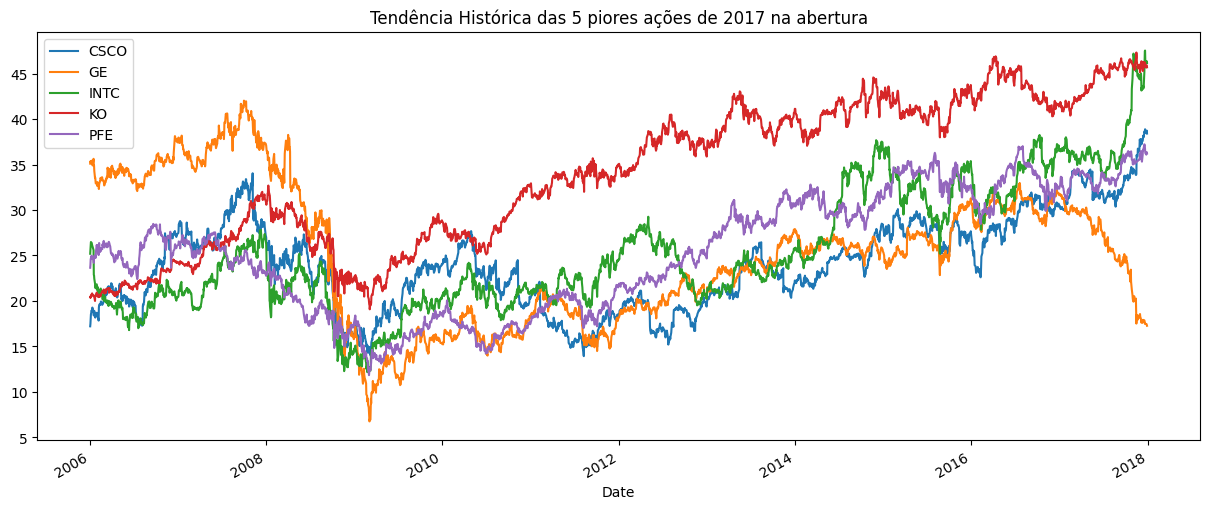

In [16]:
#pegando as linhas que contem algum dos nomes da variavel ws
filtered_df=tdf[tdf.Name.isin(ws)]
#agrupa esses dados por nome
grouped_df=filtered_df.groupby('Name')
#extrai somente os preços de abertura
open_prices=grouped_df.Open
open_prices.plot(title='Tendência Histórica das 5 piores ações de 2017 na abertura',legend=True)
plt.show()

In [20]:
# Identifica os 5 melhores stocks

best_stocks=df[df.Date==df.Date.max()].sort_values('Open',ascending=False).head(5)

# capturando os nomes dos melhores 
bs=best_stocks.Name.values
bs

array(['AMZN', 'GOOGL', 'BA', 'GS', 'MMM'], dtype=object)

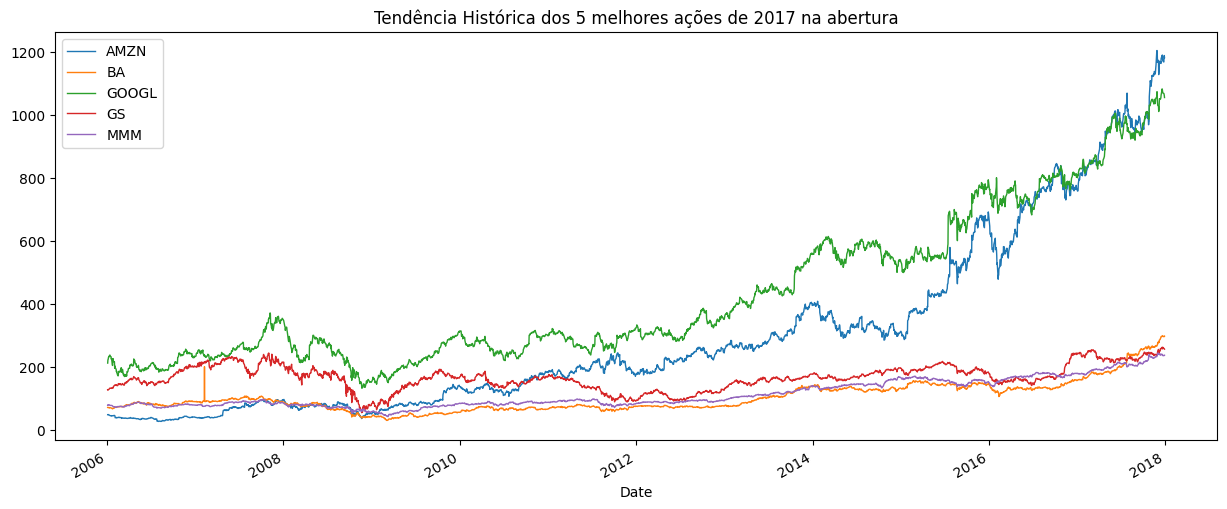

In [21]:
filtered_df = tdf[tdf.Name.isin(bs)]
group_df=filtered_df.groupby('Name')
open_prices=group_df.Open
open_prices.plot(title='Tendência Histórica dos 5 melhores ações de 2017 na abertura', legend=True, linewidth=1)
plt.show()

#Histogram

In [2]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [ ]:
#carrego os dados e determino a coluna Time como index
df=pd.read_csv('italy_earthquakes_from_2016-08-24_to_2016-11-30.csv').set_index('Time')

In [4]:
df.head()

,Latitude,Longitude,Depth/Km,Magnitude
Time,,,,
2016-08-24 03:36:32.000,42.6983,13.2335,8.1,6.0
2016-08-24 03:37:26.580,42.7123,13.2533,9.0,4.5
2016-08-24 03:40:46.590,42.7647,13.1723,9.7,3.8
2016-08-24 03:41:38.900,42.7803,13.1683,9.7,3.9
2016-08-24 03:42:07.170,42.7798,13.1575,9.7,3.6


In [5]:
df.index

Index(['2016-08-24 03:36:32.000', '2016-08-24 03:37:26.580',
       '2016-08-24 03:40:46.590', '2016-08-24 03:41:38.900',
       '2016-08-24 03:42:07.170', '2016-08-24 03:43:58.700',
       '2016-08-24 03:44:38.660', '2016-08-24 03:44:56.400',
       '2016-08-24 03:46:12.240', '2016-08-24 03:46:46.000',
       ...
       '2016-11-30 16:31:52.990', '2016-11-30 17:05:07.420',
       '2016-11-30 17:06:56.970', '2016-11-30 17:53:02.710',
       '2016-11-30 18:09:16.920', '2016-11-30 18:39:27.600',
       '2016-11-30 18:43:14.850', '2016-11-30 20:18:27.550',
       '2016-11-30 20:45:11.780', '2016-11-30 20:54:35.890'],
      dtype='object', name='Time', length=8086)

In [ ]:
#aqui as informações de tempo passam do tipo object para datetime
df.index=pd.to_datetime(df.index)
df.index

DatetimeIndex([       '2016-08-24 03:36:32', '2016-08-24 03:37:26.580000',
               '2016-08-24 03:40:46.590000', '2016-08-24 03:41:38.900000',
               '2016-08-24 03:42:07.170000', '2016-08-24 03:43:58.700000',
               '2016-08-24 03:44:38.660000', '2016-08-24 03:44:56.400000',
               '2016-08-24 03:46:12.240000',        '2016-08-24 03:46:46',
               ...
               '2016-11-30 16:31:52.990000', '2016-11-30 17:05:07.420000',
               '2016-11-30 17:06:56.970000', '2016-11-30 17:53:02.710000',
               '2016-11-30 18:09:16.920000', '2016-11-30 18:39:27.600000',
               '2016-11-30 18:43:14.850000', '2016-11-30 20:18:27.550000',
               '2016-11-30 20:45:11.780000', '2016-11-30 20:54:35.890000'],
              dtype='datetime64[ns]', name='Time', length=8086, freq=None)

In [ ]:
# aqui eu adiciono a variavel depth somente valores maiores ou iguais a zero e menores que 22
# a informação ["Depth/Km"] diz que no novo dataframe criado teremos somente a informação do index,
#no caso tempo e a coluna de profundidade
depth=df[(df["Depth/Km"]<22)&(df["Depth/Km"]>=0)]["Depth/Km"]
depth

Time
2016-08-24 03:36:32.000     8.1
2016-08-24 03:37:26.580     9.0
2016-08-24 03:40:46.590     9.7
2016-08-24 03:41:38.900     9.7
2016-08-24 03:42:07.170     9.7
                           ... 
2016-11-30 18:39:27.600    10.7
2016-11-30 18:43:14.850     8.6
2016-11-30 20:18:27.550     8.0
2016-11-30 20:45:11.780     9.3
2016-11-30 20:54:35.890     9.5
Name: Depth/Km, Length: 8062, dtype: float64

<Axes: xlabel='Time'>

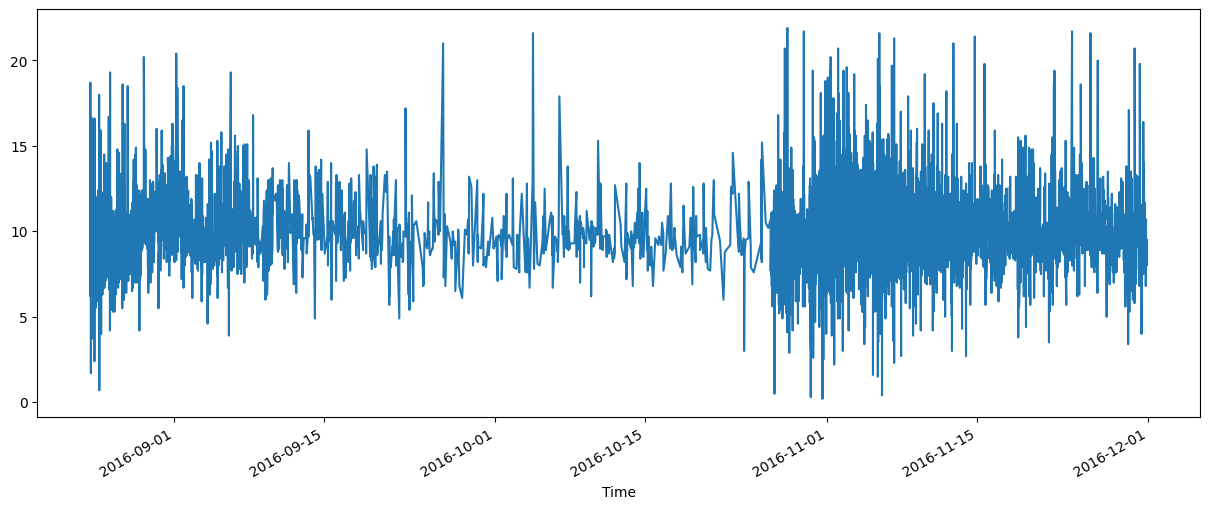

In [26]:
# Contrução do gráfico
# aqui se plotarmos sem essas definiçoes teremos a informação magnitude x tempo
depth.plot()


<Axes: ylabel='Frequency'>

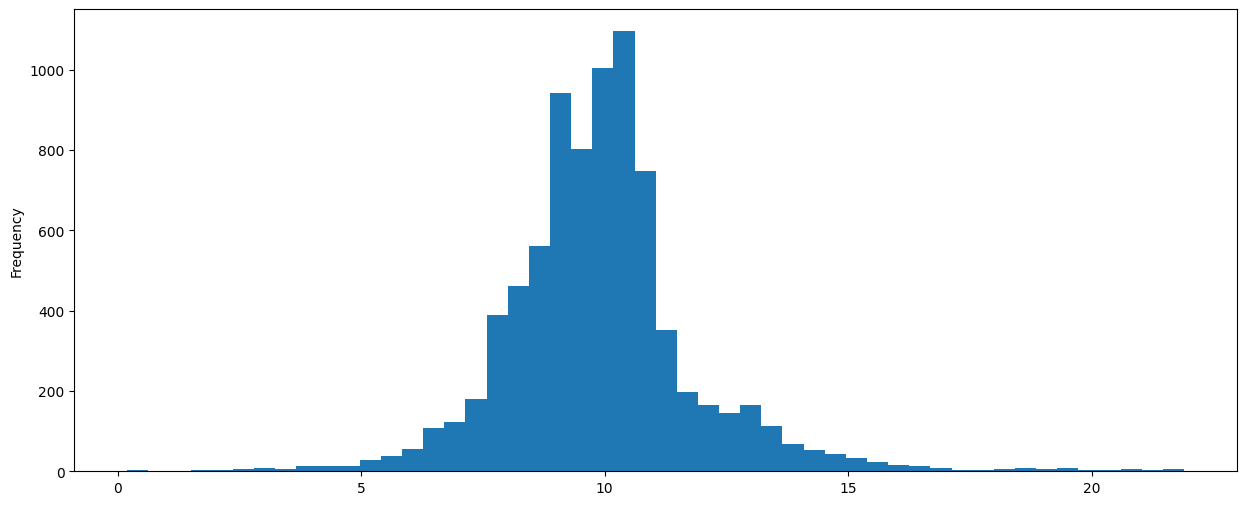

In [ ]:
# porém se o colocamos kind que define que o gráfico é um histograma e bin o espaçamento dos valores do eixo y temos o gráfico de frequencia
depth.plot(kind='hist', bins=50)

# Comparando duas Séries Temporais

In [35]:
# aqui pego od valores de magnitude maiores que tres e no novo df defino que alem 
# do index terao as colunas de magnitude e profundidade
depth_mag=df.where((df['Magnitude'] >= 3.0)).dropna()[['Magnitude','Depth/Km']]
#agrupando as informações de magnitude pela media horaria
dm=depth_mag.groupby(depth_mag.index.hour).mean()
dm.head()

,Magnitude,Depth/Km
Time,,
0,3.219048,9.071429
1,3.341667,9.720833
2,3.271429,9.457143
3,3.393478,9.556522
4,3.369811,9.173585


Text(0.5, 1.0, 'Magnitude e Profudidade durante o dia')

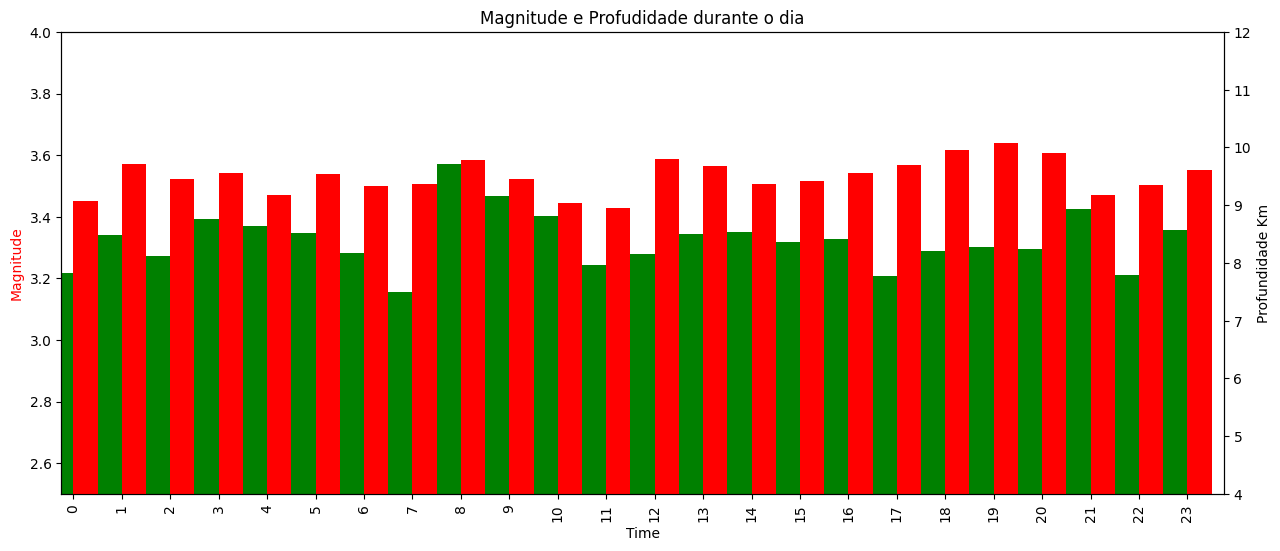

In [39]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.set_ylim([2.5,4.0])
ax.set_xlabel('Hora do dia')
ax.set_ylabel('Magnitude')
ax.yaxis.label.set_color("green")

ax2=ax.twinx()
ax2.set_ylim([4.0,12])
ax2.set_xlabel('Hora do dia')
ax2.set_ylabel('Profundidade Km')
ax.yaxis.label.set_color("red")

dm['Magnitude'].plot(kind='bar',color='green',ax=ax,width=0.5,position=1)
dm['Depth/Km'].plot(kind='bar',color='red',ax=ax2,width=0.5,position=0)

plt.title("Magnitude e Profudidade durante o dia")